<a href="https://colab.research.google.com/github/definite3988/Copyright-Registration-Image-Retrieval-Example-Method/blob/main/Copyright_Registration_Image_Retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📜 Copyright Registration Image Retrieval  

## 🔍 Problem Statement  
The dataset (`/content/copyright_records.csv`) contains **test data** related to copyright registrations.  
**Important Note:** 🛑 The image files in `/content/sample copyright` are for **reference only** and should **not** be used for actual verification.  

## ⚡ Approach  
This method helps retrieve **metadata-based copyright registrations** efficiently.  
Since images are only **reference files**, our approach focuses on **text-based metadata matching** using AI.  

### **🔹 Steps**
1. **Extract metadata** (Title, Registration Number, Claimant).  
2. **Scan reference images** from `/content/sample copyright`.  
3. **Apply OCR (Optical Character Recognition)** to extract text from images.  
4. **Match extracted text** to metadata using **fuzzy logic** (`fuzzywuzzy`).  
5. **Rank and validate matches** based on confidence scores.  

## 🚀 Deliverables  
✅ **Proposed method** for metadata-based matching.  
✅ **Sample reference images** (for illustration only).  
✅ **Code snippet** demonstrating retrieval.  
🛑 **Images should not be used for validation**—they are reference materials.  


# 🛠️ Simple Data Analysis   



## 📰 copyright_records.csv Analysis

In [2]:
import pandas as pd

df = pd.read_csv("/content/copyright_records.csv")
df.head()  # View sample data

,Registration Number / Date,Type of Work,Title,Application Title,Date of Creation,Date of Publication,Copyright Claimant,Authorship on Application,Rights and Permissions,Description,Nation of First Publication,Names
0,VA0002335524 / 2023-01-02,Visual Material,Pattern 69775-120.,Pattern 69775-120.,2022,11/8/2022,"GUANGDONG ZHONGKANG EMBROIDERY TECHNOLOGY CO.,...","2-D artwork, pseud. of GUANGDONG ZHONGKANG EMB...","GUANGDONG ZHONGKANG EMBROIDERY TECHNOLOGY CO.,...",Electronic file (eService),China,"2-D artwork, pseud., GUANGDONG ZHONGKANG EMBRO..."
1,VA0002335526 / 2023-01-02,Visual Material,Pattern 69776-120.,Pattern 69776-120.,2022,11/8/2022,"GUANGDONG ZHONGKANG EMBROIDERY TECHNOLOGY CO.,...","2-D artwork, pseud. of GUANGDONG ZHONGKANG EMB...","GUANGDONG ZHONGKANG EMBROIDERY TECHNOLOGY CO.,...",Electronic file (eService),China,"2-D artwork, pseud., GUANGDONG ZHONGKANG EMBRO..."
2,VA0002363902 / 2023-01-16,Visual Material,"NekoMoon, Original.","NekoMoon, Original.",2022,8/31/2022,"NekoMoon, LLC. Address: P.O. Box 752796, 6210 ...","NekoMoon, LLC, Domicile: United States; employ...","NekoMoon, LLC, P.O. Box 752796, 6210 N. Jones ...",Electronic file (eService),United States,"NekoMoon, LLC"
3,VA0002363502 / 2023-02-01,Visual Material,The Premier Horse Sale Advertisement - Version 1.,The Premier Horse Sale Advertisement - Version 1.,2020,6/9/2020,The Premier Horse LLC. Address: 2418 Shoreline...,"The Premier Horse LLC, Domicile: United States...","Tyesha Wilson, The Premier Horse LLC, 14 Cherr...",Electronic file (eService),United States,The Premier Horse LLC
4,VA0002363723 / 2023-01-30,Visual Material,NB160318X2.,NB160318X2.,2017,4/28/2017,"NEMAN BROTHERS AND ASSOCIATES, Transfer: by wr...","BERNINI STUDIO, employer for hire; Citizenship...","ADRINEH MOKHTARIANS, NEMAN BROTHERS AND ASSOCI...",Electronic file (eService),United States,"BERNINI STUDIO, NEMAN BROTHERS AND ASSOCIATES"


## 📷sample copyright Images Analysis

<ipython-input-4-623e64775d7d>:31: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


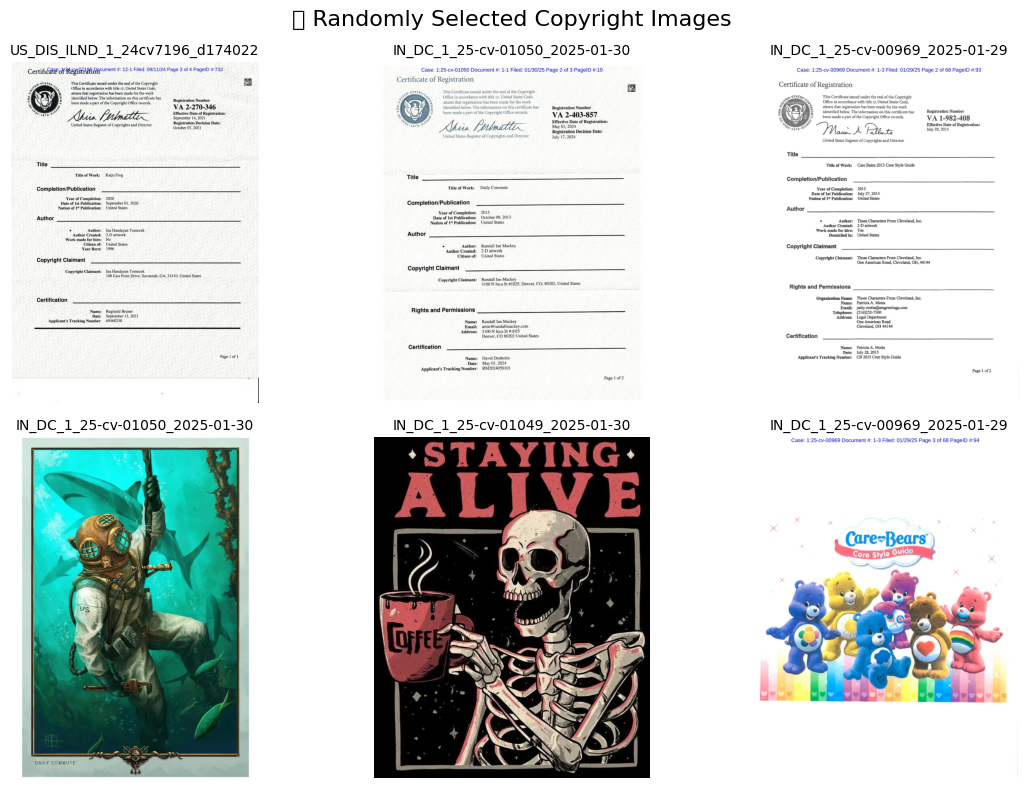

In [4]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Define paths
image_folder = "/content/sample copyright"
metadata_file = "/content/copyright_records.csv"

# List files & filter images
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.webp'))]

# Randomly select images
num_images = min(6, len(image_files))  # Show up to 6 images
selected_images = random.sample(image_files, num_images)

# Set up grid layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.suptitle("📷 Randomly Selected Copyright Images", fontsize=16)

# Display images in grid
for ax, img_name in zip(axes.flat, selected_images):
    img_path = os.path.join(image_folder, img_name)
    img = Image.open(img_path)

    ax.imshow(img)
    ax.set_title(img_name[:30], fontsize=10)  # Show truncated file name
    ax.axis("off")  # Hide axes for cleaner view

plt.tight_layout()
plt.show()


# ⚡ Approach  

In [6]:
!pip install fuzzywuzzy
!pip install pytesseract
!pip install easyocr
!pip install Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128220 (\N{SCROLL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


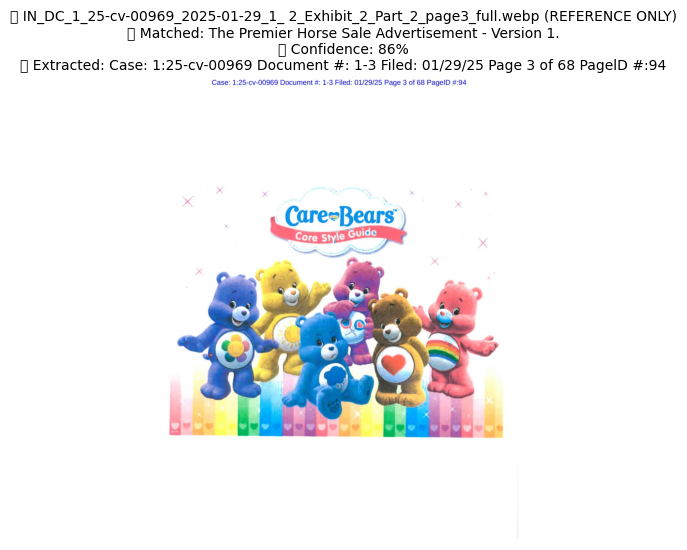

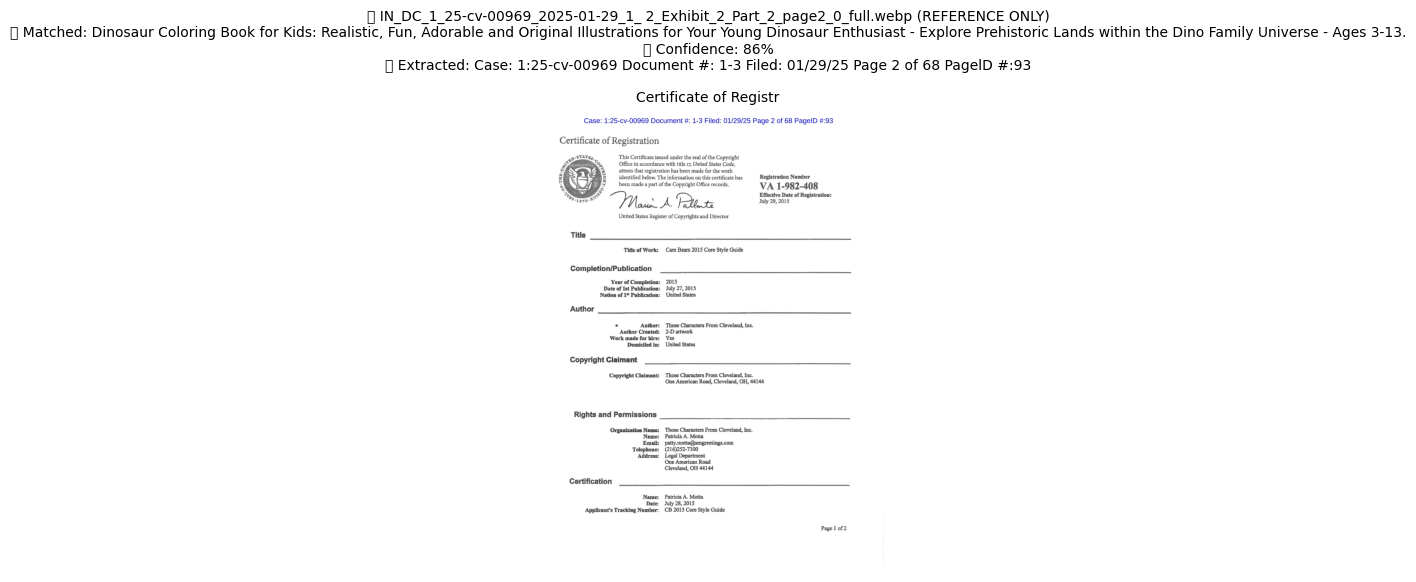

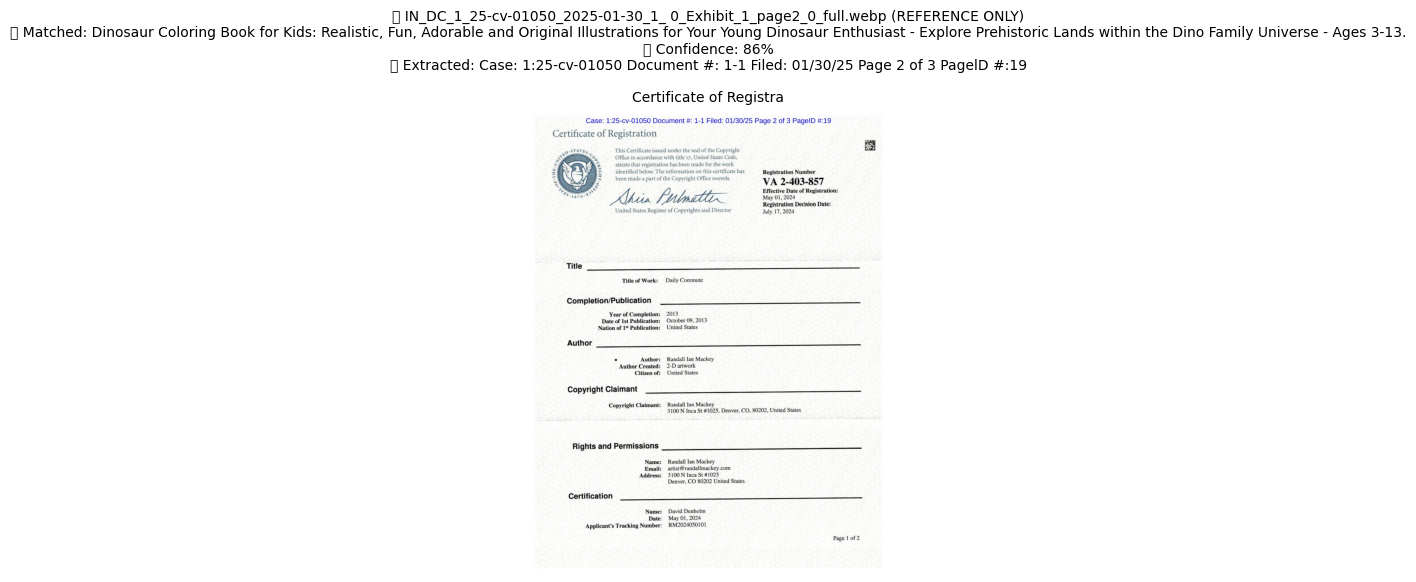

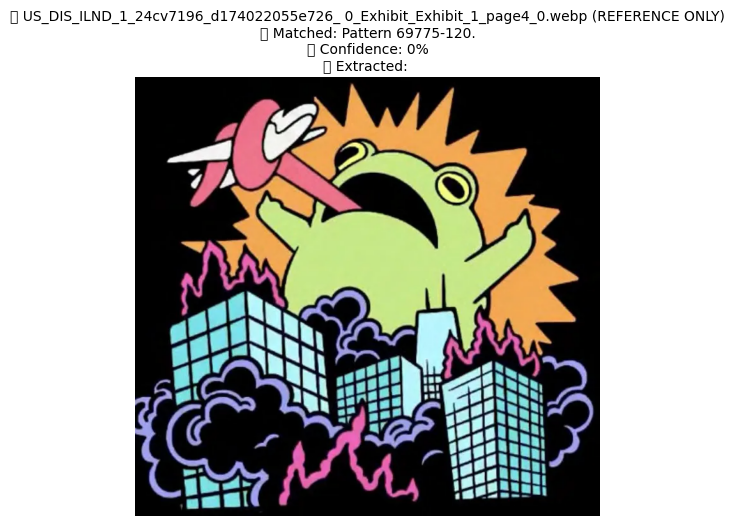

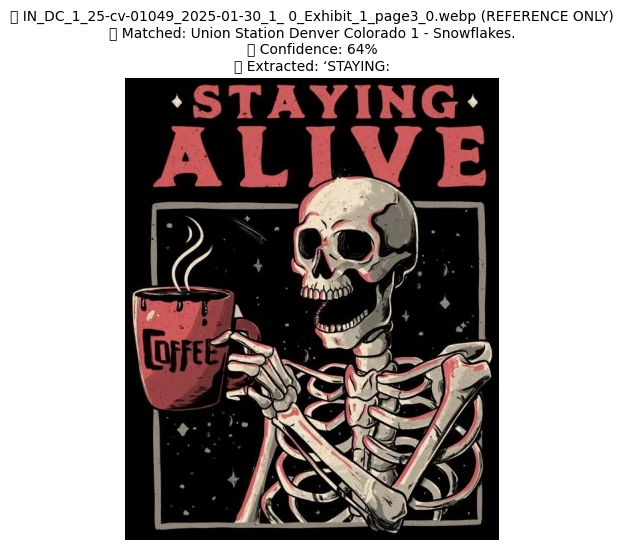

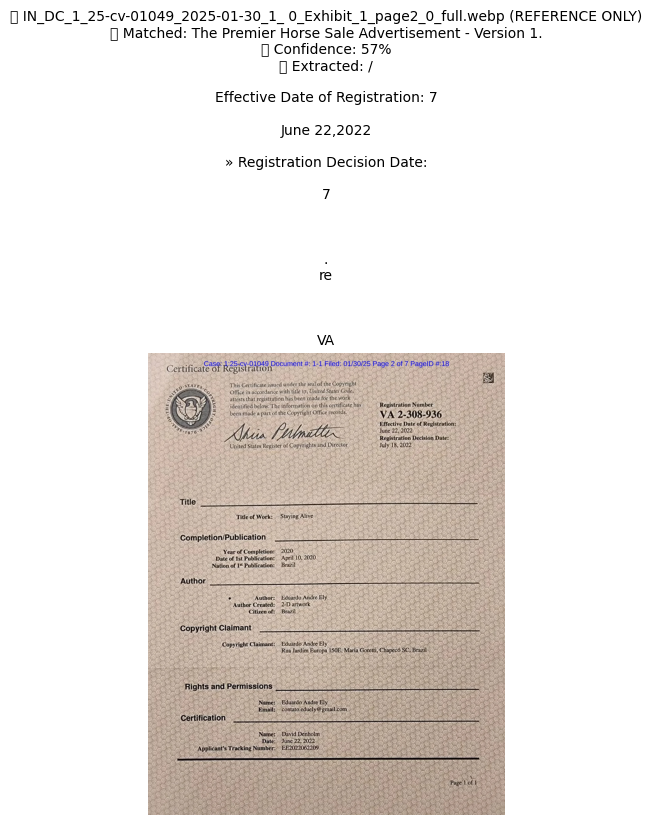

In [9]:
import os
import pandas as pd
import random
import pytesseract
from fuzzywuzzy import process
from PIL import Image
import matplotlib.pyplot as plt

# 🛑 IMPORTANT: Images are for REFERENCE ONLY—this code does NOT verify authenticity!

# Define paths
metadata_file = "/content/copyright_records.csv"
image_folder = "/content/sample copyright"

# Load metadata
df = pd.read_csv(metadata_file)
titles = df["Title"].tolist()  # Extract copyright titles for matching

# List reference image files
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.webp'))]

# Extract text from images using OCR (FOR REFERENCE ONLY)
def extract_text(image_path):
    img = Image.open(image_path)
    return pytesseract.image_to_string(img).strip()

# Process images and match text
matches = {}
for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    extracted_text = extract_text(img_path)

    # Fuzzy match extracted text to metadata
    best_match, score = process.extractOne(extracted_text, titles)

    matches[img_name] = {"match": best_match, "score": score, "extracted_text": extracted_text}

# Randomly select images for display (FOR REFERENCE ONLY)
num_images = min(6, len(image_files))
selected_images = random.sample(image_files, num_images)

# Display images one by one
for img_name in selected_images:
    img_path = os.path.join(image_folder, img_name)
    img = Image.open(img_path)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"🖼️ {img_name} (REFERENCE ONLY)\n📜 Matched: {matches[img_name]['match']}\n🔍 Confidence: {matches[img_name]['score']}%\n📝 Extracted: {matches[img_name]['extracted_text'][:100]}", fontsize=10)
    plt.axis("off")
    plt.show()
